Janani VENKATESAN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# 1. Dataset Overview

In [ ]:
#import the dataset

sales_data=pd.read_csv('sales.csv')
sales_data.head(5)

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#checking for null values

print(sales_data.isnull().sum())

Order ID          0
Order Date        0
Order Year        0
Order Quarter     0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


In [ ]:
#Total rows and column

total_rows,total_columns=sales_data.shape
print(f"Number of rows: {total_rows}")
print(f"Number of columns: {total_columns}")

Number of rows: 9994
Number of columns: 22


In [ ]:
#checking the data type

sales_data_type=sales_data.dtypes
print(sales_data_type)

Order ID          object
Order Date        object
Order Year         int64
Order Quarter      int64
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [ ]:
#exploratory analysis
print(sales_data.describe())

        Order Year  Order Quarter   Postal Code         Sales     Quantity  \
count  9994.000000    9994.000000   9983.000000   9994.000000  9994.000000   
mean   2017.722233       2.694617  55245.233297    229.858001     3.789574   
std       1.123555       1.107635  32038.715955    623.245101     2.225110   
min    2016.000000       1.000000   1040.000000      0.444000     1.000000   
25%    2017.000000       2.000000  23223.000000     17.280000     2.000000   
50%    2018.000000       3.000000  57103.000000     54.490000     3.000000   
75%    2019.000000       4.000000  90008.000000    209.940000     5.000000   
max    2019.000000       4.000000  99301.000000  22638.480000    14.000000   

          Discount       Profit  
count  9994.000000  9994.000000  
mean      0.156203    28.656896  
std       0.206452   234.260108  
min       0.000000 -6599.978000  
25%       0.000000     1.728750  
50%       0.200000     8.666500  
75%       0.200000    29.364000  
max       0.800000  8399.

# 2. Exploring the Dataset

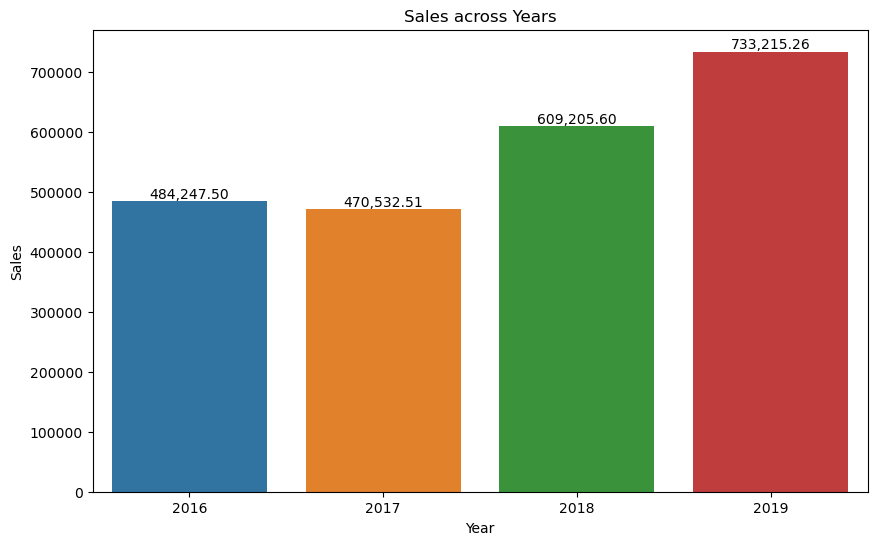

In [ ]:
#Sales across years

def valuesonbar(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

yearly_sales = sales_data.groupby('Order Year')['Sales'].sum()

plt.figure( figsize = (10,6 ))
chart=sb.barplot(data=yearly_sales.reset_index(), x='Order Year', y='Sales', errorbar=None)
chart.set_title('Sales across Years')
chart.set_xlabel('Year')
chart.set_ylabel('Sales')
valuesonbar(chart)
plt.show()

We can see a little drop in the sales between 2016 and 2017. This decrease is followed by a strong increase until 2019.

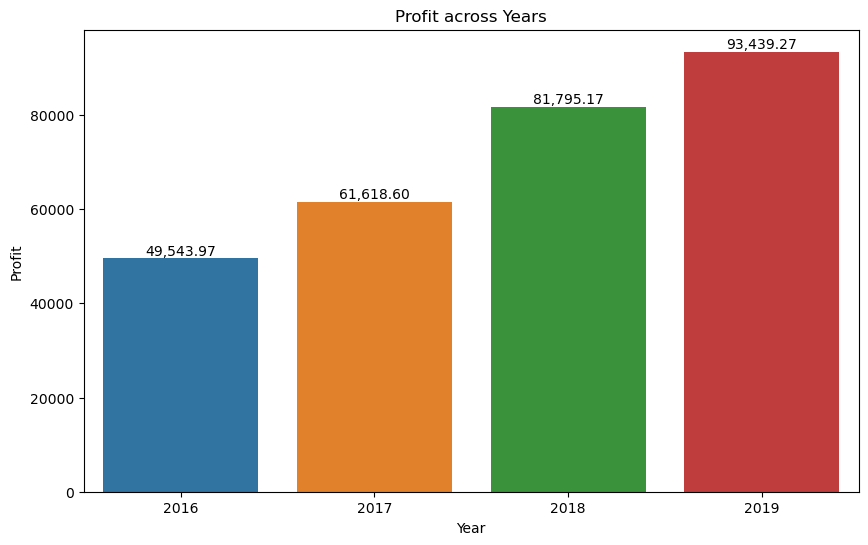

In [ ]:
#Profit across years

def valuesonbar(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

yearly_sales = sales_data.groupby('Order Year')['Profit'].sum()

plt.figure( figsize = (10,6 ))
chart=sb.barplot(data=yearly_sales.reset_index(), x='Order Year', y='Profit', errorbar=None)
chart.set_title('Profit across Years')
chart.set_xlabel('Year')
chart.set_ylabel('Profit')
valuesonbar(chart)
plt.show()

The profit kept increasing between 2016 and 2019, it nearly doubled.

                Profit        Sales  Profit_Ratio
Order Year                                       
2016        49543.9741  484247.4981     10.231126
2017        61618.6037  470532.5090     13.095504
2018        81795.1743  609205.5980     13.426530
2019        93439.2696  733215.2552     12.743771


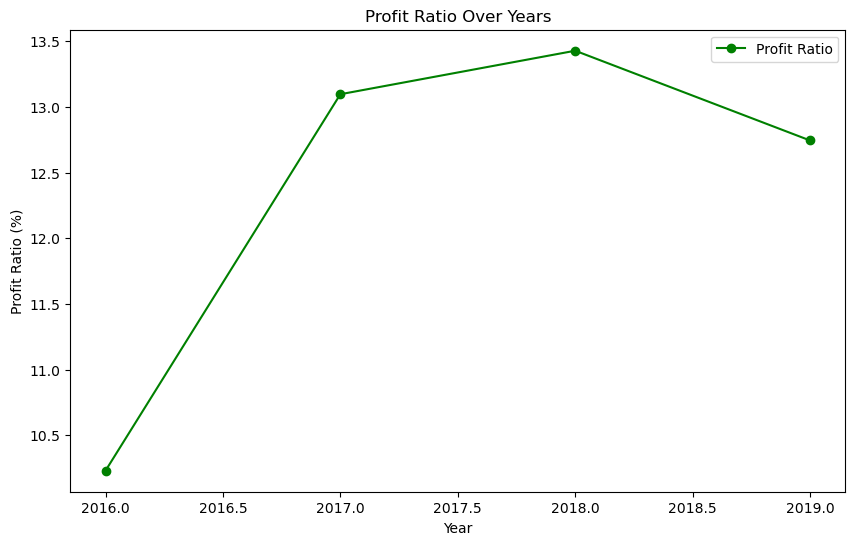

In [ ]:
# Calculate profit ratio for each year

grouped_year = sales_data.groupby('Order Year').agg({'Profit': 'sum', 'Sales': 'sum'})

grouped_year['Profit_Ratio'] = (grouped_year['Profit'] / grouped_year['Sales']) * 100

print(grouped_year)


# Plot Profit Ratio over Order Year
plt.figure(figsize=(10, 6))
plt.plot(grouped_year.index, grouped_year['Profit_Ratio'], marker='o', color='green', label='Profit Ratio')
plt.title('Profit Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('Profit Ratio (%)')
plt.legend()
plt.show()

The Profit Ratio experienced a significant surge between 2016 and 2018, with an overall growth of 3.2 percentage points, including a substantial increase of 2.86 percentage points between 2016 and 2017. However, we observe a decline of 0,68 points of percentage between 2018 and 2019.

As sales and profits increased over the 4 years, the profit ratio exhibited multiple variations. Consequently, we have chosen to concentrate on analyzing the profit ratio and elucidating the reasons behind its fluctuations.

In the following analysis we will look for the reasons behind the sudden surge and the decrease.

# 3. Category and Sub-Category Analysis

## 3.1. Category Analysis

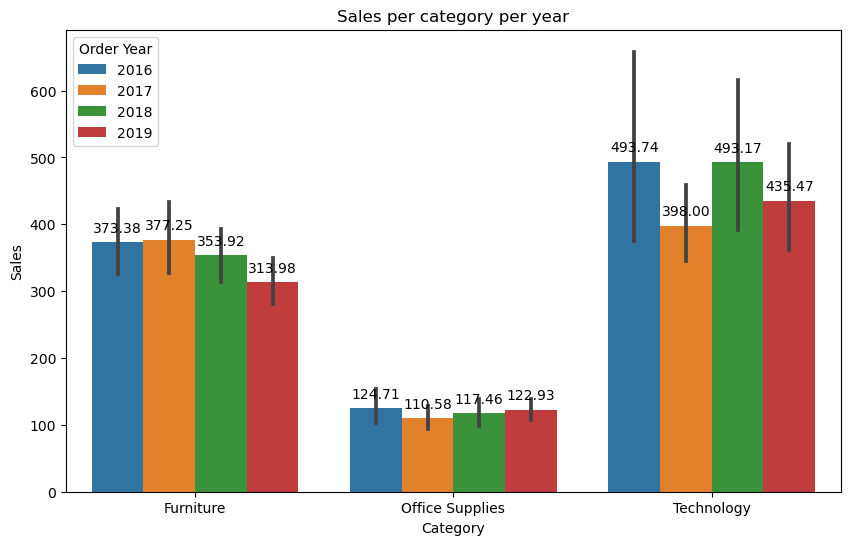

In [ ]:
#overall sales across per category per year

def valuesonbar(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.figure(figsize=(10, 6))
chart = sb.barplot(data=sales_data, x='Category', y='Sales',hue='Order Year')
chart.set_title('Sales per category per year')
values_on_bars(chart)
plt.show()

                                Profit        Sales  Profit_Ratio
Category        Order Year                                       
Furniture       2016         5457.7255  157192.8531      3.471993
                2017         3015.2029  170518.2370      1.768258
                2018         6959.9531  198901.4360      3.499197
                2019         3018.3913  215387.2692      1.401379
Office Supplies 2016        22593.4161  151776.4120     14.885986
                2017        25099.5338  137233.4630     18.289660
                2018        35061.2292  183939.9820     19.061233
                2019        39736.6217  246097.1750     16.146720
Technology      2016        21492.8325  175278.2330     12.262123
                2017        33503.8670  162780.8090     20.582197
                2018        39773.9920  226364.1800     17.570798
                2019        50684.2566  271730.8110     18.652377


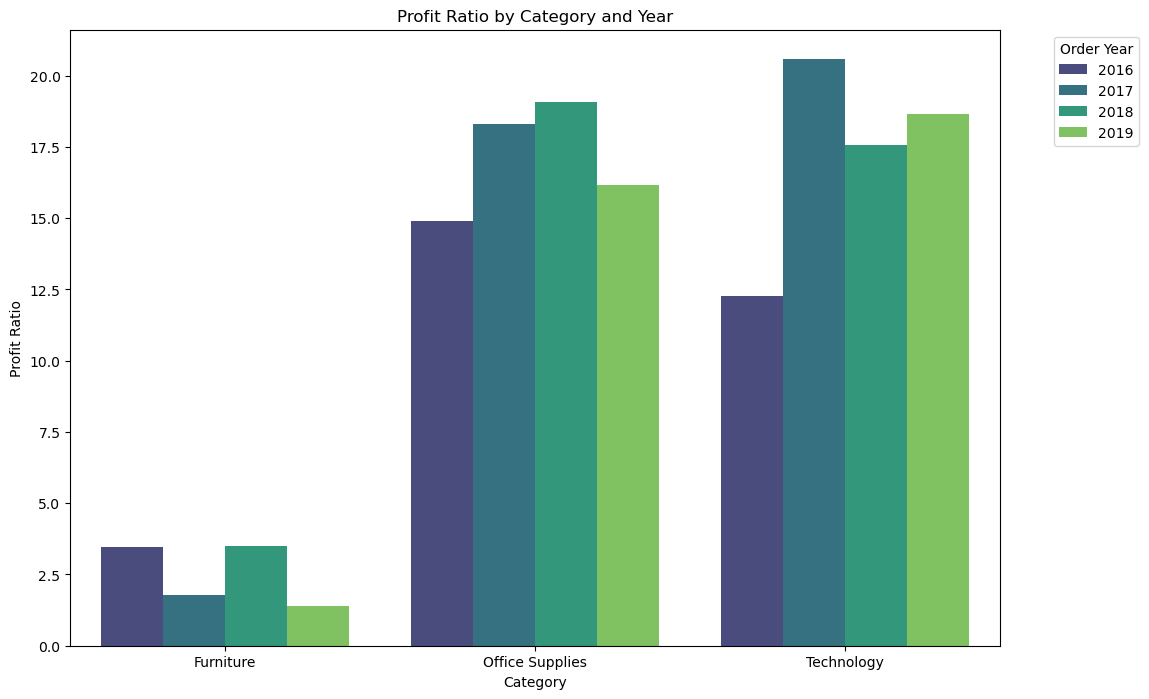

In [ ]:
#Profit Ratio Analysis

grouped_category_year = sales_data.groupby(['Category', 'Order Year']).agg({'Profit': 'sum', 'Sales': 'sum'})

# Calculate profit ratio for each category by year
grouped_category_year['Profit_Ratio'] = (grouped_category_year['Profit'] / grouped_category_year['Sales']) * 100

print(grouped_category_year)

# Resetting the index to make 'Category' a regular column
grouped_category_year = grouped_category_year.reset_index()

# Plot Category Profit Ratio over Order Year
plt.figure(figsize=(12, 8))
chart = sb.barplot(data=grouped_category_year, x='Category', y='Profit_Ratio', hue='Order Year', palette='viridis')
chart.set_title('Profit Ratio by Category and Year')
chart.set_xlabel('Category')
chart.set_ylabel('Profit Ratio')
plt.legend(title='Order Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.show()


There is a huge increase between 2016 and 2017 for Office Supplies (3,4 points of %) and Technology (8,32 points of %). Then we can notice a significant decrease for Office Supplies between 2018 and 2019. Even if the sales are high for furniture the profit ratio is very low compared to Office supplies where the sales are very low and the profit ratio is high.

## 3.2. Sub-Category Analysis

In [ ]:
grouped_subcat = sales_data.groupby('Sub-Category').agg({'Profit': 'sum', 'Sales': 'sum'})

# Calculate profit ratio by Sub-Category by year
grouped_subcat['Profit_Ratio'] = (grouped_subcat['Profit'] / grouped_subcat['Sales']) * 100

print(grouped_subcat)

                  Profit        Sales  Profit_Ratio
Sub-Category                                       
Accessories   41936.6357  167380.3180     25.054700
Appliances    18138.0054  107532.1610     16.867517
Art            6527.7870   27118.7920     24.071083
Binders       30221.7633  203412.7330     14.857361
Bookcases     -3472.5560  114879.9963     -3.022768
Chairs        26590.1663  328449.1030      8.095673
Copiers       55617.8249  149528.0300     37.195585
Envelopes      6964.1767   16476.4020     42.267582
Fasteners       949.5182    3024.2800     31.396504
Furnishings   13059.1436   91705.1640     14.240358
Labels         5546.2540   12486.3120     44.418672
Machines       3384.7569  189238.6310      1.788618
Paper         34053.5693   78479.2060     43.391837
Phones        44515.7306  330007.0540     13.489327
Storage       21278.8264  223843.6080      9.506113
Supplies      -1189.0995   46673.5380     -2.547695
Tables       -17725.4811  206965.5320     -8.564460


Bookcases, Supplies and Tables have negative profit.
Machines have very low profit ratio, as well as Storage annd Chairs.
However Copiers, Envelopes, Fasteners, paper have high positive ratio.

   Sub-Category  Order Year     Profit       Sales  Profit_Ratio
0     Bookcases        2016  -346.1707  20036.6776     -1.727685
1     Bookcases        2017 -2755.2302  38543.5725     -7.148352
2     Bookcases        2018   212.4710  26275.4665      0.808629
3     Bookcases        2019  -583.6261  30024.2797     -1.943847
4        Chairs        2016  6955.0470  77241.5760      9.004279
5        Chairs        2017  6228.4161  71734.5290      8.682591
6        Chairs        2018  5763.1539  83918.6450      6.867549
7        Chairs        2019  7643.5493  95554.3530      7.999164
8      Machines        2016   369.1689  62023.3730      0.595209
9      Machines        2017  2977.4856  27763.6970     10.724384
10     Machines        2018  2907.3180  55906.8860      5.200286
11     Machines        2019 -2869.2156  43544.6750     -6.589131
12      Storage        2016  4166.2788  50329.0420      8.278081
13      Storage        2017  3505.4601  45048.2480      7.781568
14      Storage        20

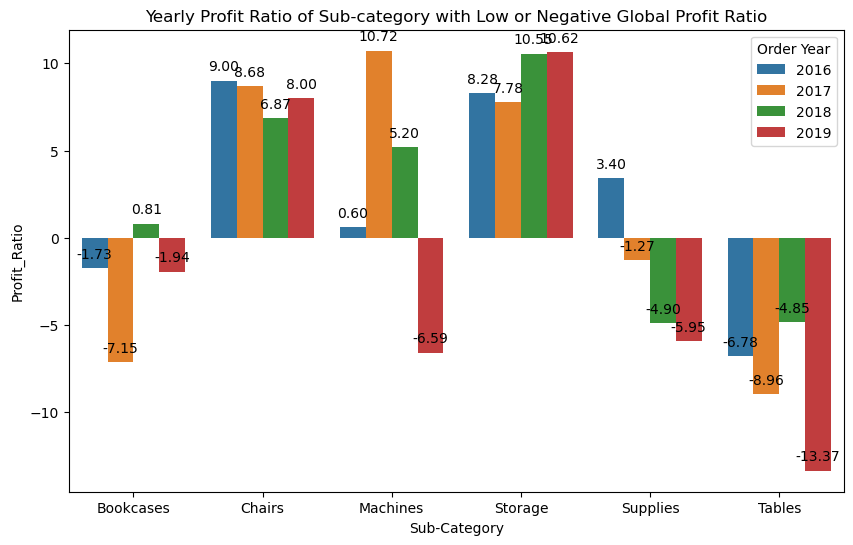

In [ ]:
#Profit Ratio analysis for sub-category

grouped_subcat_year = sales_data.groupby(['Sub-Category', 'Order Year']).agg({'Profit': 'sum', 'Sales': 'sum'})

# Calculate profit ratio by Sub-Category by year
grouped_subcat_year['Profit_Ratio'] = (grouped_subcat_year['Profit'] / grouped_subcat_year['Sales']) * 100

# Filter to include only specific sub-categories
selected_subcategories = ['Bookcases', 'Supplies', 'Tables', 'Machines', 'Storage', 'Chairs']
filtered_grouped_subcat_year = grouped_subcat_year[grouped_subcat_year.index.get_level_values('Sub-Category').isin(selected_subcategories)]

# Resetting the index to make 'Sub-Category' a regular column
filtered_grouped_subcat_year = filtered_grouped_subcat_year.reset_index()

print(filtered_grouped_subcat_year)

plt.figure(figsize=(10, 6))
chart = sb.barplot(data=filtered_grouped_subcat_year, x='Sub-Category', y='Profit_Ratio',hue='Order Year')
chart.set_title('Yearly Profit Ratio of Sub-category with Low or Negative Global Profit Ratio')
values_on_bars(chart)
plt.show()

Bookcases, Supplies and Tables have almost only negative profit ratio. Tables, Machines have a drastic fall between 2018 and 2019.

   Sub-Category  Order Year      Profit      Sales  Profit_Ratio
0       Copiers        2016   2912.9433  10849.782     26.847943
1       Copiers        2017   9930.2988  26179.450     37.931656
2       Copiers        2018  17742.7926  49599.410     35.772185
3       Copiers        2019  25031.7902  62899.388     39.796556
4     Envelopes        2016   1495.4788   3855.750     38.785679
5     Envelopes        2017   1960.1906   4512.188     43.442131
6     Envelopes        2018   2066.7483   4729.890     43.695483
7     Envelopes        2019   1441.7590   3378.574     42.673595
8     Fasteners        2016    178.5583    661.328     26.999961
9     Fasteners        2017    171.9376    545.224     31.535222
10    Fasteners        2018    294.0734    960.134     30.628371
11    Fasteners        2019    304.9489    857.594     35.558656
12        Paper        2016   6371.0214  14834.956     42.946008
13        Paper        2017   6570.1700  15287.638     42.977012
14        Paper        20

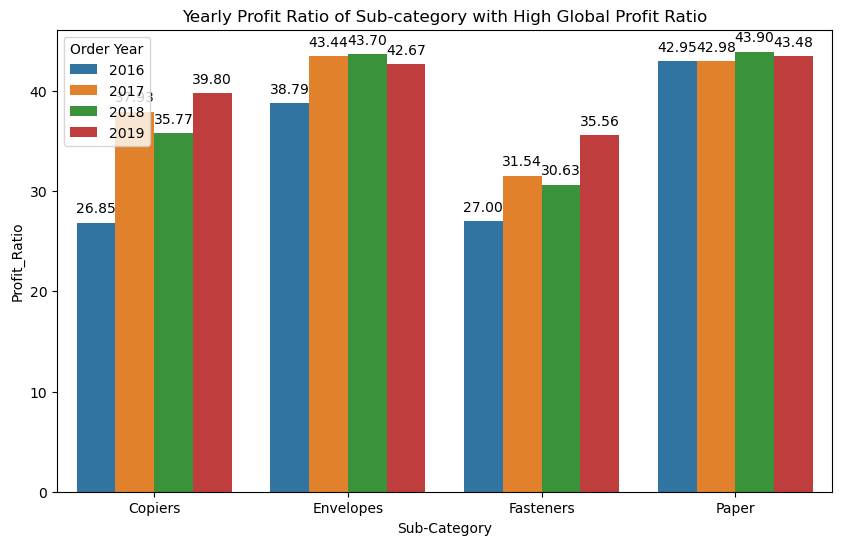

In [ ]:
grouped_subcat_year = sales_data.groupby(['Sub-Category', 'Order Year']).agg({'Profit': 'sum', 'Sales': 'sum'})

# Calculate profit ratio by Sub-Category by year
grouped_subcat_year['Profit_Ratio'] = (grouped_subcat_year['Profit'] / grouped_subcat_year['Sales']) * 100

# Filter to include only specific sub-categories
selected_subcategories2 = ['Copiers', 'Envelopes', 'Fasteners', 'Paper']
filtered_grouped_subcat_year2 = grouped_subcat_year[grouped_subcat_year.index.get_level_values('Sub-Category').isin(selected_subcategories2)]

# Resetting the index to make 'Sub-Category' a regular column
filtered_grouped_subcat_year2 = filtered_grouped_subcat_year2.reset_index()

print(filtered_grouped_subcat_year2)

plt.figure(figsize=(10, 6))
chart = sb.barplot(data=filtered_grouped_subcat_year2, x='Sub-Category', y='Profit_Ratio',hue='Order Year')
chart.set_title('Yearly Profit Ratio of Sub-category with High Global Profit Ratio')
values_on_bars(chart)
plt.show()

Copiers, Envelopes, Fasteners and Paper had substantial grow between 2016 and 2019 but particularly between 2016 and 2017.

After analyzing categories and sub-categories, we should also look into other features and analyze how they impact the profit ratio.

# 4. Region, Segment and Ship Mode Analysis

## 4.1. Region Analysis

     Region  Order Year      Profit        Sales  Profit_Ratio
0   Central        2016    539.5534  103838.1646      0.519610
1   Central        2017  11716.8020  102874.2220     11.389444
2   Central        2018  19899.1629  147429.3760     13.497421
3   Central        2019   7550.8442  147098.1282      5.133202
4      East        2016  17059.6095  128680.4570     13.257343
5      East        2017  21091.0130  156332.0570     13.491163
6      East        2018  20141.5961  180685.8220     11.147303
7      East        2019  33230.5614  213082.9040     15.595133
8     South        2016  11879.1200  103845.8435     11.439187
9     South        2017   8318.5940   71359.9805     11.657226
10    South        2018  17702.8084   93610.2235     18.911191
11    South        2019   8848.9079  122905.8575      7.199745
12     West        2016  20065.6912  147883.0330     13.568623
13     West        2017  20492.1947  139966.2495     14.640811
14     West        2018  24051.6069  187480.1765     12

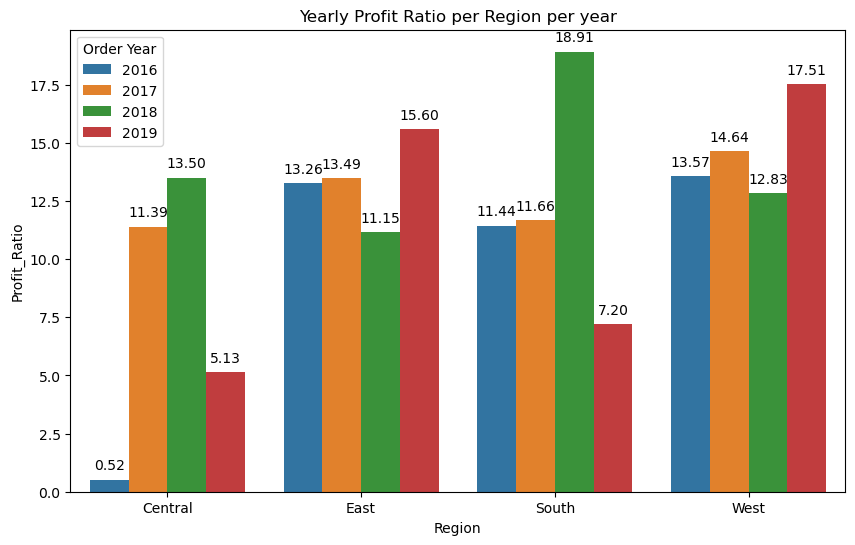

In [ ]:
grouped_region_year = sales_data.groupby(['Region', 'Order Year']).agg({'Profit': 'sum', 'Sales': 'sum'})

# Calculate profit ratio by Ship Mode by year
grouped_region_year['Profit_Ratio'] = (grouped_region_year['Profit'] / grouped_region_year['Sales']) * 100

# Resetting the index to make 'Sub-Category' a regular column
grouped_region_year = grouped_region_year.reset_index()

print(grouped_region_year)

plt.figure(figsize=(10, 6))
chart = sb.barplot(data=grouped_region_year, x='Region', y='Profit_Ratio',hue='Order Year')
chart.set_title('Yearly Profit Ratio per Region per year')
values_on_bars(chart)
plt.show()

Central shows an extreme surge between 2016 and 2017 (10,87 points of percentage) tailed by a dramatic decline of 8,37 points of percentage between 2018 and 2019. South region also a massive plunge of 11,71 of points of percentage from 2018 to 2019.

The two regions might be one of the cause of downfall of the global profit ratio between 2018 and 2019.

## 4.2. Segment Analysis

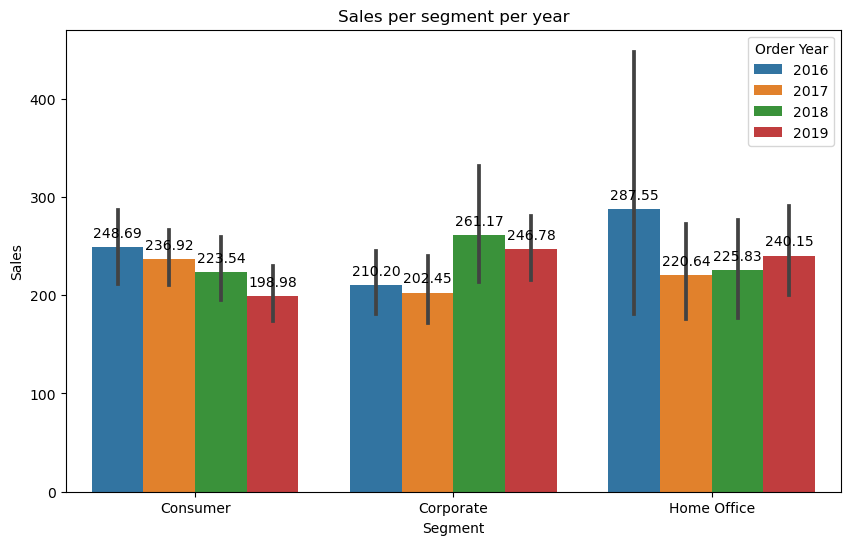

In [ ]:
#overall sales per segment per year

def values_on_bars(chart):
    for p in chart.patches:
        chart.annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2.,
                       p.get_height()),
                       ha='center',
                       va='center',
                       xytext=(0, 10),
                       textcoords='offset points')

plt.figure(figsize=(10, 6))
chart = sb.barplot(data=sales_data, x='Segment', y='Sales',hue='Order Year')
chart.set_title('Sales per segment per year')
values_on_bars(chart)
plt.show()

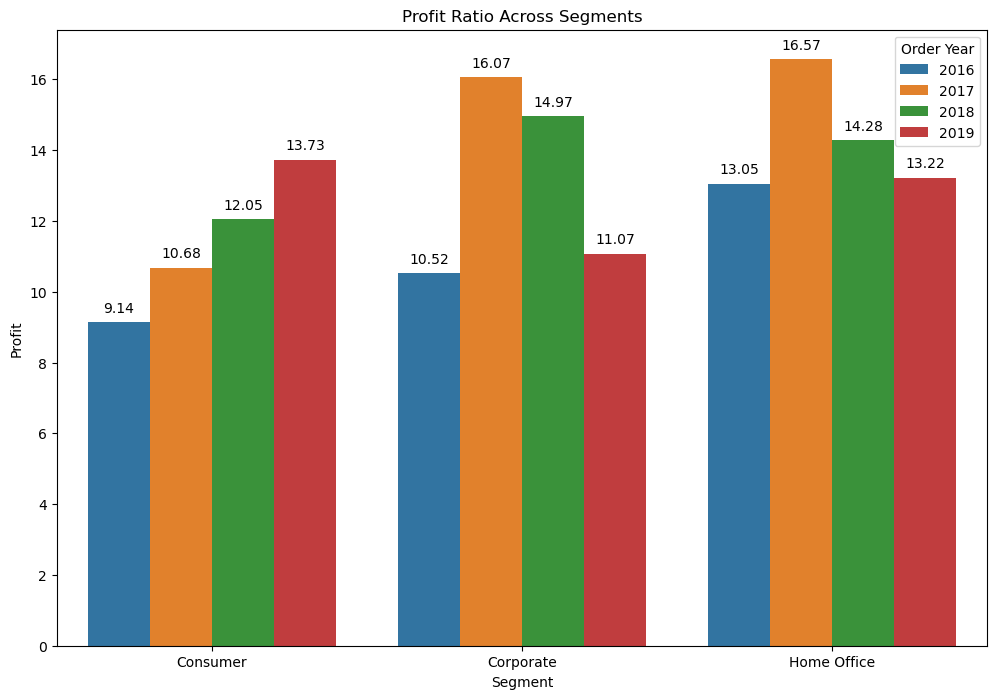

In [ ]:
#Profit ratio by segement

def values_on_bars(chart):
    for p in chart.patches:
        chart.annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2.,
                       p.get_height()),
                       ha='center',
                       va='center',
                       xytext=(0, 10),
                       textcoords='offset points')

grouped_segment_year = sales_data.groupby(['Segment', 'Order Year']).agg({'Profit': 'sum', 'Sales': 'sum'})

# Calculate profit ratio by Sub-Category by year
grouped_segment_year['Profit_Ratio'] = (grouped_segment_year['Profit'] / grouped_segment_year['Sales']) * 100

plt.figure(figsize=(12, 8))
chart = sb.barplot(data=grouped_segment_year.reset_index(), x='Segment', y='Profit_Ratio', hue='Order Year', errorbar=None)
chart.set_title('Profit Ratio Across Segments')
chart.set_xlabel('Segment')
chart.set_ylabel('Profit')
values_on_bars(chart)
plt.show()

An increase of the profit ratio for all the segments between 2016 and 2017 can be noticed.
However, important decreases in Corporate and Home Office between 2018 and 2019 are observed.  

We should highlight that even when the sales decreases over the years the profit ratio for Consumer still grew, we can deducte that profit is very high in this segment.

## 4.3. Ship Mode Analysis

                               Profit        Sales  Profit_Ratio
Ship Mode      Order Year                                       
First Class    2016         9073.5332   59769.2645     15.180935
               2017        10146.4402   69259.4390     14.649902
               2018         9355.8487   82265.3428     11.372771
               2019        20394.0178  140134.3766     14.553187
Same Day       2016         2755.5071   17470.1340     15.772673
               2017         4327.4275   27611.4900     15.672561
               2018         5440.4492   34505.7610     15.766785
               2019         3368.3751   48775.7400      6.905841
Second Class   2016         9759.4570  101386.7800      9.625966
               2017        10751.1519   89102.7254     12.066019
               2018        16346.7570  120002.4406     13.622020
               2019        20589.2695  148701.6234     13.846029
Standard Class 2016        27955.4768  305621.3196      9.147096
               2017      

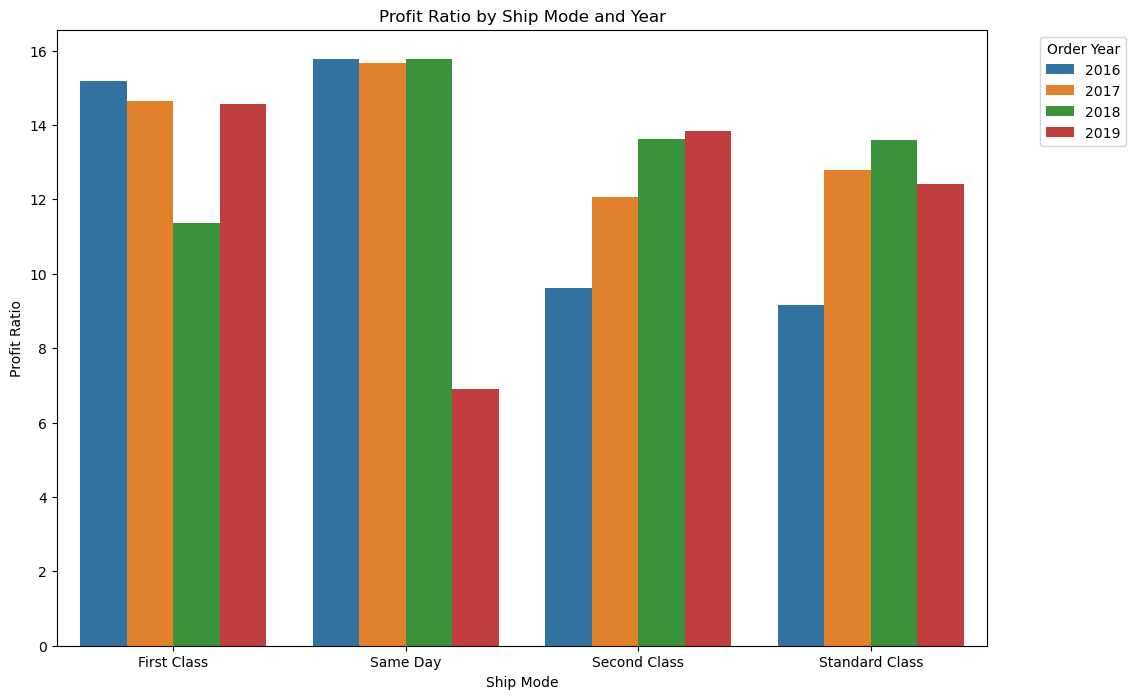

In [ ]:
 grouped_shipmode_year = sales_data.groupby(['Ship Mode', 'Order Year']).agg({'Profit': 'sum', 'Sales': 'sum'})

# Calculate profit ratio by Ship Mode by year
grouped_shipmode_year['Profit_Ratio'] = (grouped_shipmode_year['Profit'] / grouped_shipmode_year['Sales']) * 100

print(grouped_shipmode_year)



# Plot Ship Mode Profit Ratio over Order Year
plt.figure(figsize=(12, 8))
chart = sb.barplot(data=grouped_shipmode_year.reset_index(), x='Ship Mode', y='Profit_Ratio', hue='Order Year')
chart.set_title('Profit Ratio by Ship Mode and Year')
chart.set_xlabel('Ship Mode')
chart.set_ylabel('Profit Ratio')
plt.legend(title='Order Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.show()

A substantial downturn of profit ratio for Same Day between 2018 and 2019 (8,80 points of percentage) alerted us.

Same Day shipment mode experienced a downfall that can particaly explain the global profit ratio decrease.

# 5. Discounts

## 5.1. Discounts vs Profit Ratio

/Users/mahyoub/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/mahyoub/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


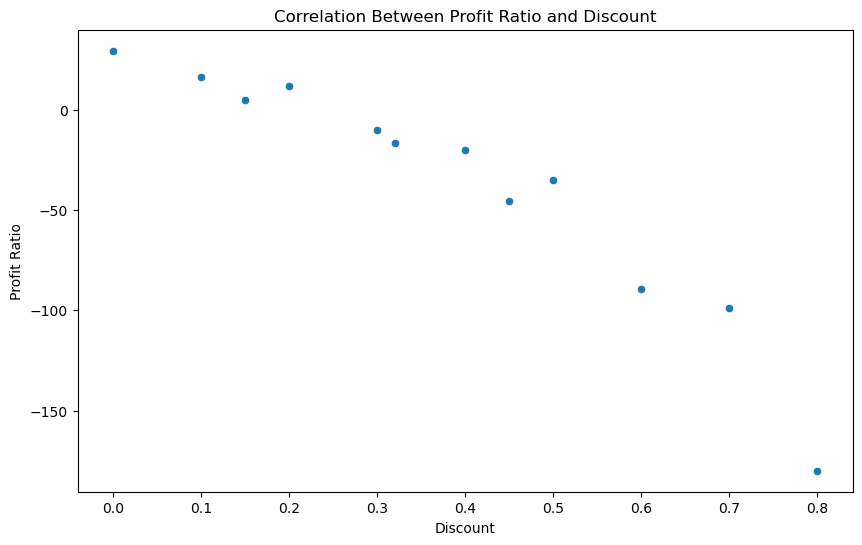

In [ ]:
#using correlation to visualize the correlation between profit ratio and discount
discount_profit_ratio = sales_data.groupby('Discount')[['Profit', 'Sales']].sum()
discount_profit_ratio['Profit Ratio'] = discount_profit_ratio['Profit'] / discount_profit_ratio['Sales']*100

correlation = discount_profit_ratio['Profit Ratio'].corr(sales_data['Discount'])

plt.figure(figsize=(10, 6))
sb.scatterplot(x='Discount', y='Profit Ratio', data=discount_profit_ratio)
plt.title('Correlation Between Profit Ratio and Discount')
plt.xlabel('Discount')
plt.ylabel('Profit Ratio')
plt.show()

With the increase of discount we can observe a decrease of the profit ratio. There is a negative correlation.

Discounts percentage should be limited in order to maximize profit ratio.

We will analyze the discount variable to the previous features that showed a plunge between 2018 and 2019.

## 5.2. Discount vs Category

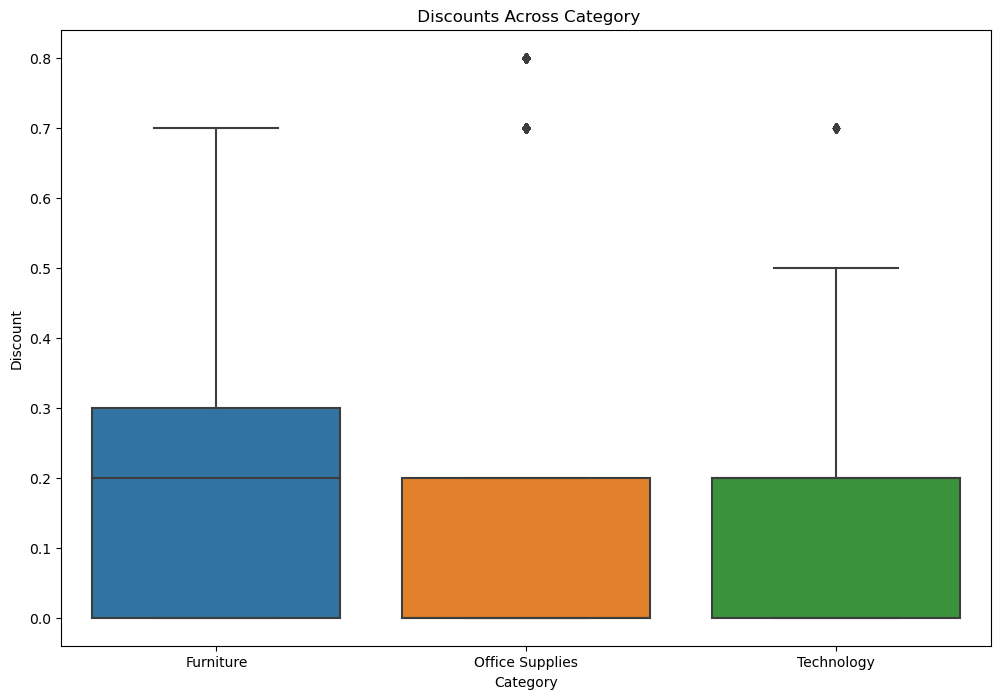

In [ ]:
#disocunt across Category

plt.figure(figsize=(12, 8))
sb.boxplot(data=sales_data, x='Category', y='Discount')
plt.title(' Discounts Across Category')
plt.xlabel('Category')
plt.ylabel('Discount')
plt.show()

Furniture is the Category that was generating the less profit ratio. It can be explained by the discounts given to the customers. In fact, the average discount is higher in Furniture Category.

## 5.3. Discount vs Region

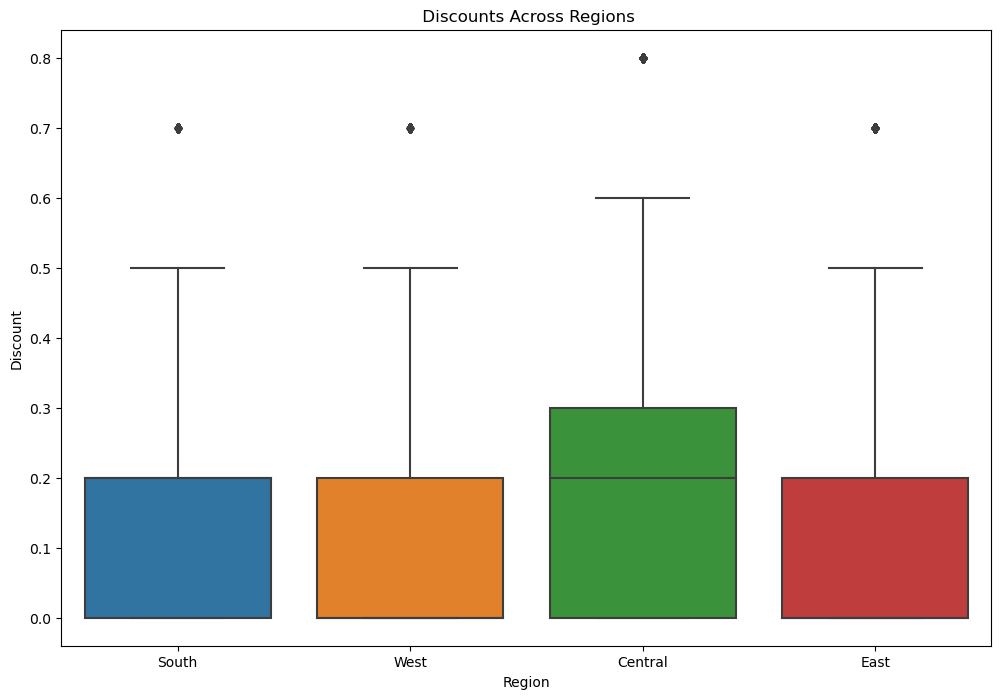

In [ ]:
#discount across region

plt.figure(figsize=(12, 8))
sb.boxplot(data=sales_data, x='Region', y='Discount')
plt.title(' Discounts Across Regions')
plt.xlabel('Region')
plt.ylabel('Discount')
plt.show()

Central is the Region that was generating the less profit ratio. It can also be explained by the discounts given to the customers. In fact, the average discount is higher in Central Region.

## 5.4. Discount vs Segment

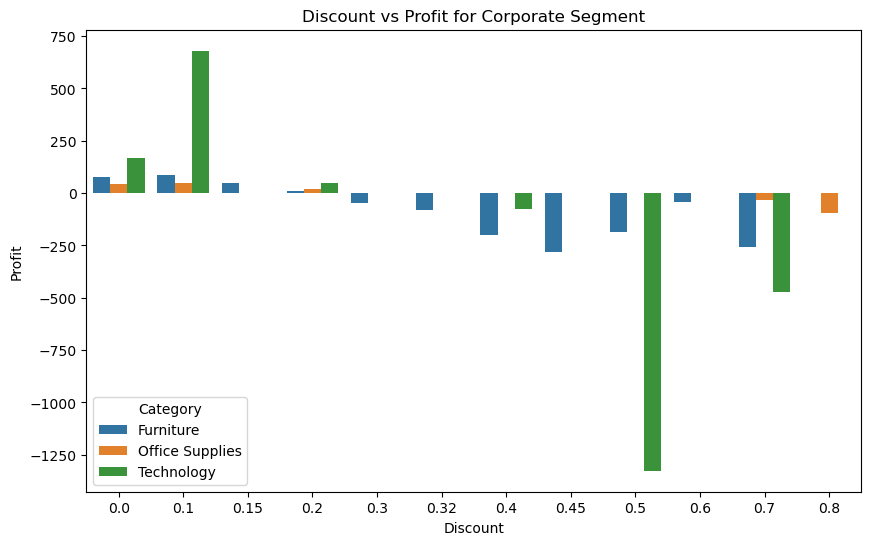

In [ ]:
#corporate segment analysis

corporate_data = sales_data[sales_data['Segment'] == 'Corporate']

corporate_data_profit = corporate_data.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum()

corporate_segment = corporate_data.groupby(['Discount', 'Category'])['Profit'].mean().reset_index()

#plot
plt.figure(figsize=(10, 6))
chart = sb.barplot(data=corporate_segment, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit for Corporate Segment')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

Corporate was the segment with the biggest drop in profit ratio. We can notice that discount have a negative correlation with profit for all category. A significant discount in Technology will lead to a significat loss in term of profit.

## 5.5 Discount vs Ship Mode

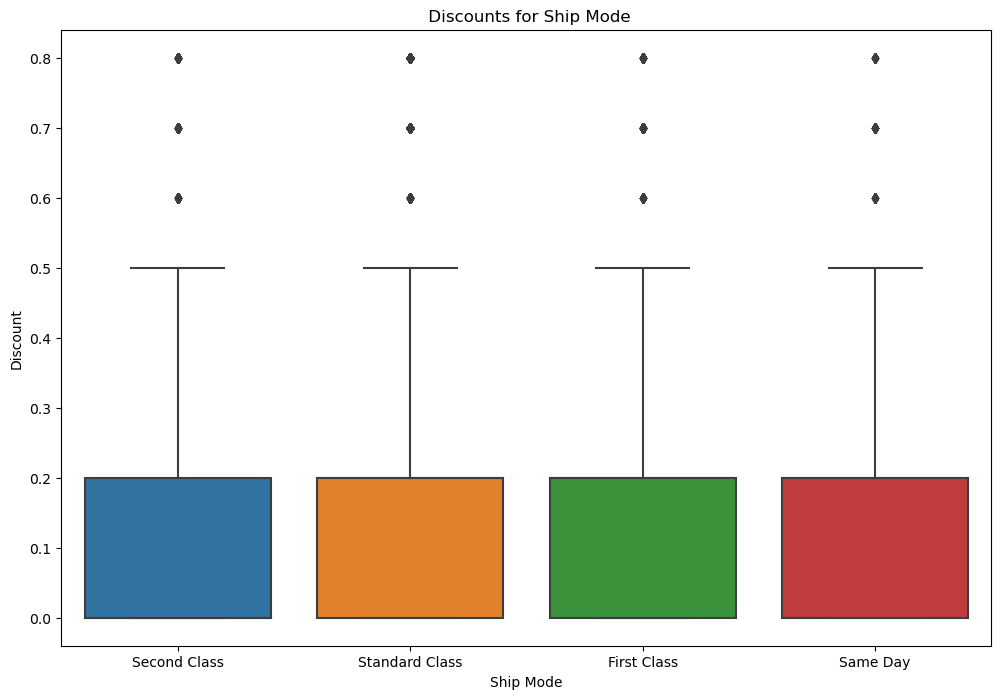

In [ ]:
#discount for ship mode

plt.figure(figsize=(12, 8))
sb.boxplot(data=sales_data, x='Ship Mode', y='Discount')
plt.title(' Discounts for Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Discount')
plt.show()

Regarding the ship mode, discount doesn't influence it. The reason behind the drop of profit ratio for the Same Day mode might be explained by the number of days for the delivery or eve the price for each mode.

## 5.6. Discount vs Profit Ratio for Region and Ship Mode

In [ ]:
sales_data['Profit Ratio'] = sales_data['Profit'] / sales_data['Sales']


ship_mode_pivot = sales_data.pivot_table(index='Region', columns='Ship Mode',
                                         values=['Profit Ratio', 'Discount'],
                                         aggfunc='mean')

ship_mode_pivot.style.format('{:.2f}')


This table confirmed the fact that the higher the discount, the lower the profit ratio.

Following the discount analysis we can confirme that Discount and Profit Ratio have a negative correlation.

# 6. Quantity

After the examination of the Discount variable, we will now shift our focus to another potentially significant variable, namely Quantity.

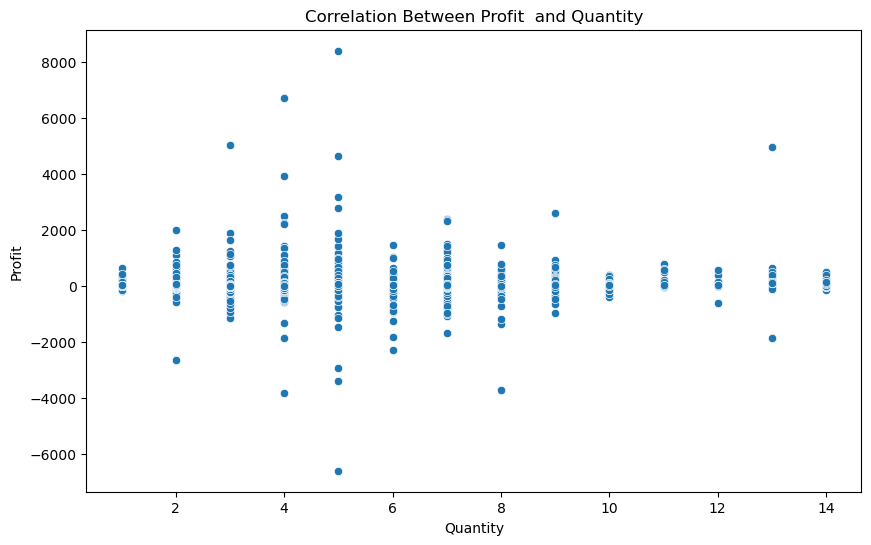

In [ ]:
#using correlation to visualize the correlation between profit ratio and quantity
correlation = sales_data['Profit'].corr(sales_data['Quantity'])

plt.figure(figsize=(10, 6))
sb.scatterplot(x='Quantity', y='Profit', data=sales_data)
plt.title('Correlation Between Profit  and Quantity')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.show()

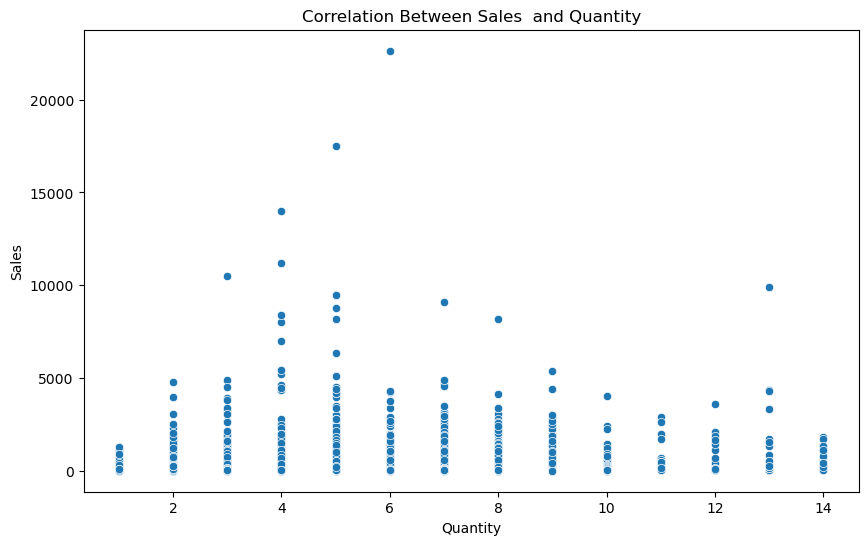

In [ ]:
#using correlation to visualize the correlation between sales and quantity
correlation = sales_data['Sales'].corr(sales_data['Quantity'])

plt.figure(figsize=(10, 6))
sb.scatterplot(x='Quantity', y='Sales', data=sales_data)
plt.title('Correlation Between Sales  and Quantity')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()

In the two preceding graphs, it is evident that the optimal quantity range for achieving the highest sales or profit lies between 3 and 7.

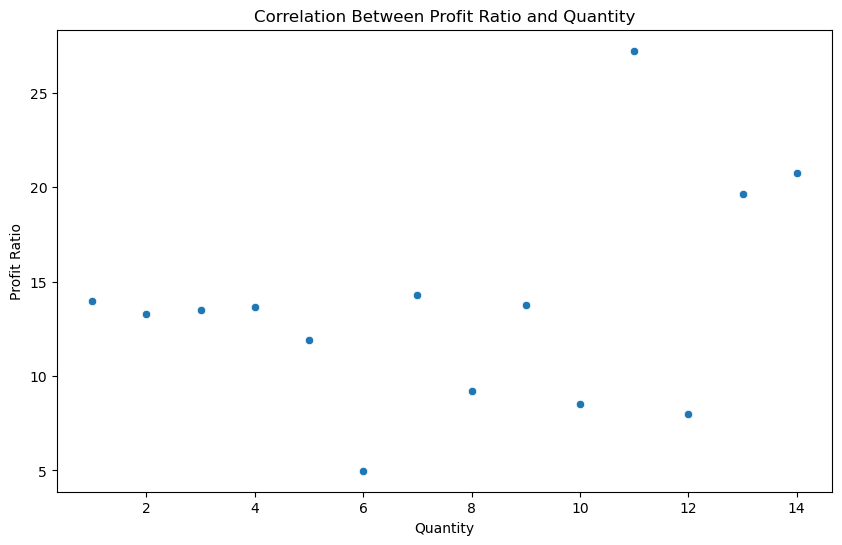

In [ ]:
#using correlation to visualize the correlation between profit ratio and discount
discount_profit_ratio = sales_data.groupby('Quantity')[['Profit', 'Sales']].sum()
discount_profit_ratio['Profit Ratio'] = discount_profit_ratio['Profit'] / discount_profit_ratio['Sales']*100

correlation = discount_profit_ratio['Profit Ratio'].corr(sales_data['Quantity'])

plt.figure(figsize=(10, 6))
sb.scatterplot(x='Quantity', y='Profit Ratio', data=discount_profit_ratio)
plt.title('Correlation Between Profit Ratio and Quantity')
plt.xlabel('Quantity')
plt.ylabel('Profit Ratio')
plt.show()

The graph illustrate the relation between Quantiy and Profit Ratio. Nevertheless, there is no apparent correaltion between the 2 variables

We can deduct that Quantity isn't a variable that affectthe profit ratio.

# CONCLUSION AND RECOMMENDATIONS

Sales and profit consistently maintained a positive trajectory, experiencing growth over the four-year period. Upon examining the profit ratio, our findings revealed a business profitability mean of 12.37%. However, a decline was observed between 2018 and 2019.

Our analysis has pinpointed several key insights that merit the business's attention for maximizing the profit ratio:

- Discount exhibit a negative correlation with the profit ratio, indicating that limiting discounts may enhance overall profitability.

- In contrast, the Quantity variable demonstrates no impact on the profit ratio, as there is no discernible correlation between the two variables.

- Central and South regions are not yielding profitability. Marketing teams should reevaluate their campaigns in these regions to address low-profit margins.

-  Furniture and Corporate are not profitable, and they are associated with high average discounts. A thorough review of the discount strategy for these features is recommended.

- The Same Day Ship mode proves to be unprofitable, whereas Second Class and Standard Class are profitable. Investigating the reasons behind the increased profitability for the latter modes and applying similar strategies to Same Day Ship is suggested.

- Specific sub-categories, including Bookcases, Supplies, Tables, Machines, Storage, and Chairs, contribute to the overall profit decline. Marketing strategies for these sub-categories should be revisited, drawing inspiration from sub-categories with a high-profit ratio, such as Copiers, Envelopes, Fasteners, and Paper.